In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [2]:
race = fastf1.get_session(2023, "British Grand Prix", 'R')
race.load()
laps = race.laps.pick_quicklaps()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\abdul\AppData\Local\Temp\fastf1.
	Size: 458.06 MB
core           INFO 	Loading data for British Grand Prix - Race [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55

In [3]:
transformed_laps = laps.copy()
transformed_laps["LapTime"] = transformed_laps["LapTime"].apply(lambda x: x.total_seconds())

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime"]]
    .groupby("Team")
    .median()["LapTime"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

Index(['Red Bull Racing', 'McLaren', 'Mercedes', 'Ferrari', 'Aston Martin',
       'AlphaTauri', 'Williams', 'Alpine', 'Alfa Romeo', 'Haas F1 Team'],
      dtype='object', name='Team')


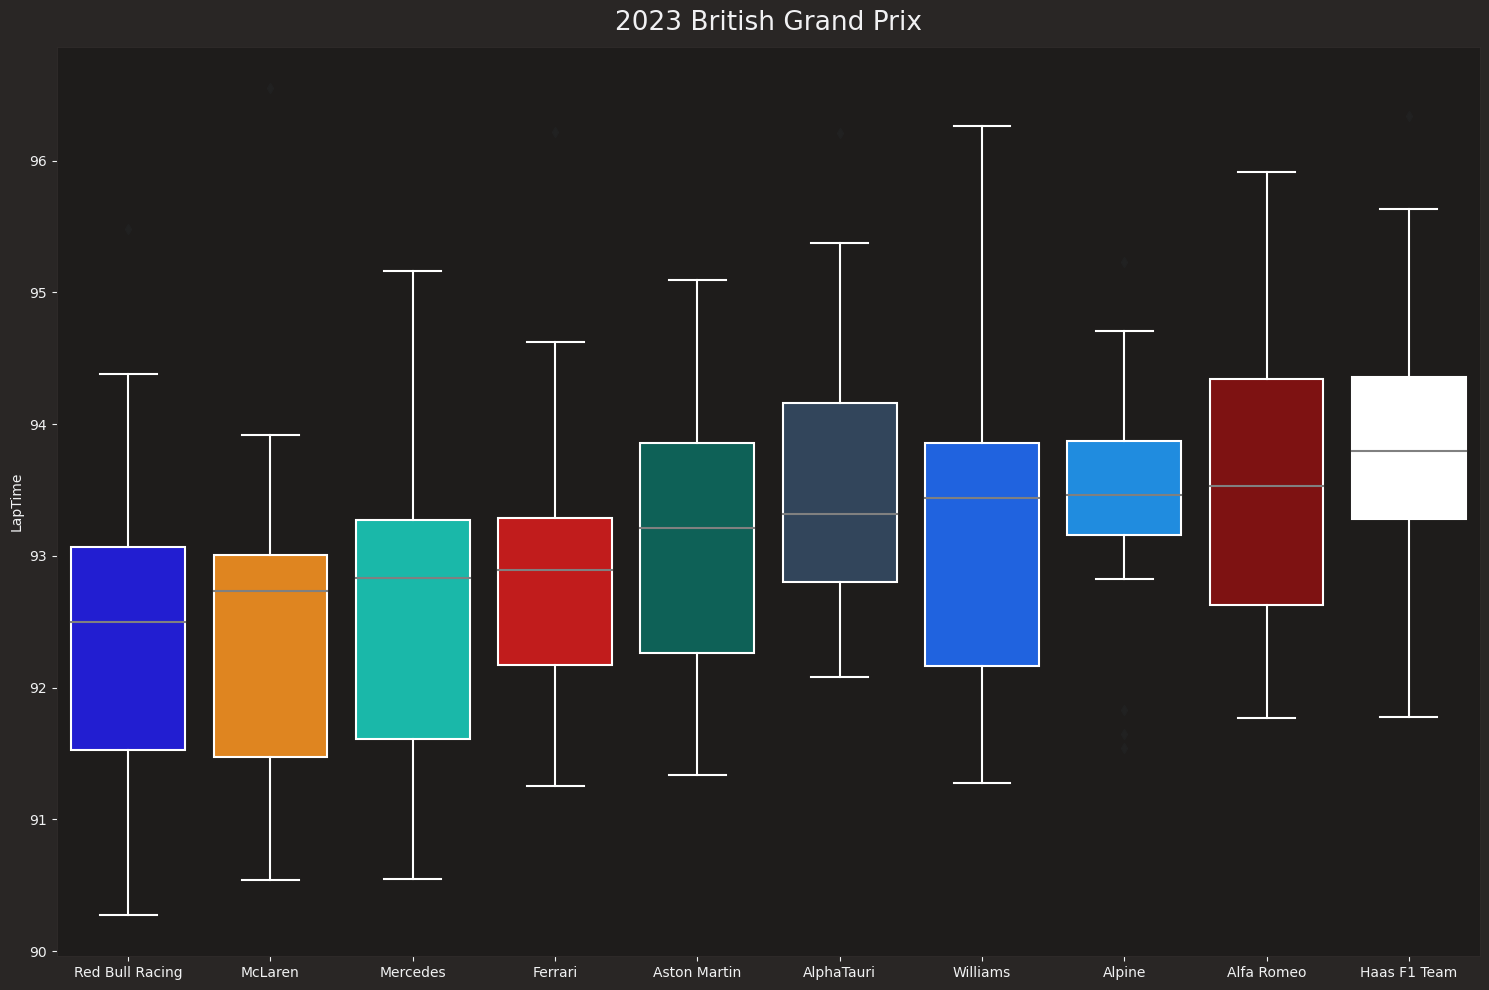

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 British Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()
